In [1]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [2]:
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 

In [3]:
from statsmodels.tsa.arima.model import ARIMA

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
pip install matplotlib


     ---------------------------------------- 0.0/162.3 kB ? eta -:--:--
     -------------- ------------------------ 61.4/162.3 kB 1.7 MB/s eta 0:00:01
     -------------------------------------- 162.3/162.3 kB 1.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
   -- ------------------------------------- 0.4/7.6 MB 12.6 MB/s eta 0:00:01
   ---- ----------------------------------- 0.9/7.6 MB 11.3 MB/s eta 0:00:01
   ------ --------------------------------- 1.3/7.6 MB 10.3 MB/s eta 0:00:01
   ---------- ----------------------------- 2.0/7.6 MB 11.3 MB/s eta 0:00:01
   ------------ --------------------------- 2.5/7.6 MB 11.3 MB/s eta 0:00:01
   ------------------ --------------------- 3.5/7.6 MB 11.2 MB/s eta 0:00:01
   --------------------- ------------------ 4.1/7.6 MB 11.8 MB/s eta 0:00:01
   ------------------------ --------------- 4.7/7.6 MB 11.5 MB/s eta 0:00:01
   --------------------------- ------------ 5.3/7.6 MB 11.6 MB/s eta 0:00:01
   --

In [8]:
Birth = pd.read_csv('D:\\karan data\\Data for Preprocessing\\Forecasting Data\\DailyTotalFemaleBirths.csv', index_col='Date', parse_dates=True)
Birth.index.freq = 'D'

In [9]:
Birth.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [35]:
trade_data = pd.read_csv('D:\\karan data\\Data for Preprocessing\\Forecasting Data\\TradeInventories.csv',index_col = 'Date', parse_dates = True)
trade_data.index.freq = 'MS'

In [36]:
trade_data

,Inventories
Date,
1997-01-01,1301161
1997-02-01,1307080
1997-03-01,1303978
1997-04-01,1319740
1997-05-01,1327294
...,...
2018-08-01,2127170
2018-09-01,2134172
2018-10-01,2144639


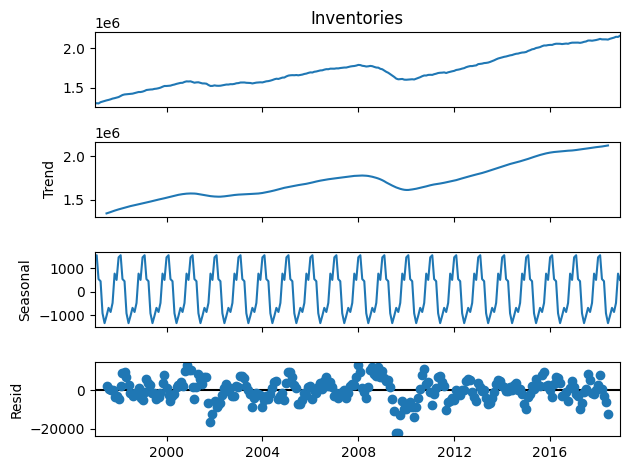

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(trade_data['Inventories'], model='additive')  # model='add' also works
result.plot();

In [63]:
auto_arima(trade_data['Inventories'],seasonal=False, trace = True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5373.961, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5348.037, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5399.843, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5350.241, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5409.217, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5378.835, Time=0.14 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.683 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2672.018
Date:                Sat, 02 Mar 2024   AIC                           5348.037
Time:                        10:03:39   BIC                           5355.181
Sample:                    01-01-1997   HQIC                          5350.908
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3258.3802    470.991      6.918      0.000    2335.255    4181.506
sigma2       3.91e+07   2.95e+06     13.250      0.000    3.33e+07    4.49e+07
===================================================================================
Ljung-Box (L1) (Q):                  82.61   Jarque-Bera (JB):               100.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -1.15
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
from statsmodels.tsa.statespace.tools import diff
trade_data['d1'] = diff(trade_data['Inventories'], k_diff = 1)

In [31]:
adf_test(trade_data['Inventories'],'Real Manufacturing and Trade Inventories')

Augmented Dickey-Fuller Test: Real Manufacturing and Trade Inventories
ADF test statistic       -0.087684
p-value                   0.950652
# lags used               5.000000
# observations          258.000000
critical value (1%)      -3.455953
critical value (5%)      -2.872809
critical value (10%)     -2.572775
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [30]:
adf_test(trade_data['d1'],'Real Manufacturing and Trade Inventories')

Augmented Dickey-Fuller Test: Real Manufacturing and Trade Inventories
ADF test statistic       -3.412249
p-value                   0.010548
# lags used               4.000000
# observations          258.000000
critical value (1%)      -3.455953
critical value (5%)      -2.872809
critical value (10%)     -2.572775
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [32]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [33]:
trade_data

,Inventories,d1
Date,,
1997-01-01,1301161,NaN
1997-02-01,1307080,5919.0
1997-03-01,1303978,-3102.0
1997-04-01,1319740,15762.0
1997-05-01,1327294,7554.0
...,...,...
2018-08-01,2127170,7552.0
2018-09-01,2134172,7002.0
2018-10-01,2144639,10467.0


In [37]:
train = trade_data.iloc[:252]
test = trade_data.iloc[252:]

In [73]:
import warnings
warnings.filterwarnings("ignore")

In [74]:
model = ARIMA(train['Inventories'],order=(1,1,1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Inventories   No. Observations:                  252
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2552.901
Date:                Sat, 02 Mar 2024   AIC                           5111.801
Time:                        10:08:09   BIC                           5122.377
Sample:                    01-01-1997   HQIC                          5116.057
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.002    579.980      0.000       0.997       1.003
ma.L1         -0.9998      0.019    -51.601      0.000      -1.038      -0.962
sigma2      3.247e+07   1.54e-11   2.11e+18      0.000    3.25e+07    3.25e+07
===================================================================================
Ljung-Box (L1) (Q):                  87.24   Jarque-Bera (JB):               100.29
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.79   Skew:                            -1.18
Prob(H) (two-sided):                  0.27   Kurtosis:                         5.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.8e+34. Standard errors may be unstable.
"""

In [75]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('ARIMA(1,1,1) Predictions')

In [76]:
predictions

2018-01-01    2.106715e+06
2018-02-01    2.109678e+06
2018-03-01    2.112642e+06
2018-04-01    2.115605e+06
2018-05-01    2.118569e+06
2018-06-01    2.121532e+06
2018-07-01    2.124496e+06
2018-08-01    2.127459e+06
2018-09-01    2.130422e+06
2018-10-01    2.133386e+06
2018-11-01    2.136349e+06
2018-12-01    2.139312e+06
Freq: MS, Name: ARIMA(1,1,1) Predictions, dtype: float64

<Axes: xlabel='Date'>

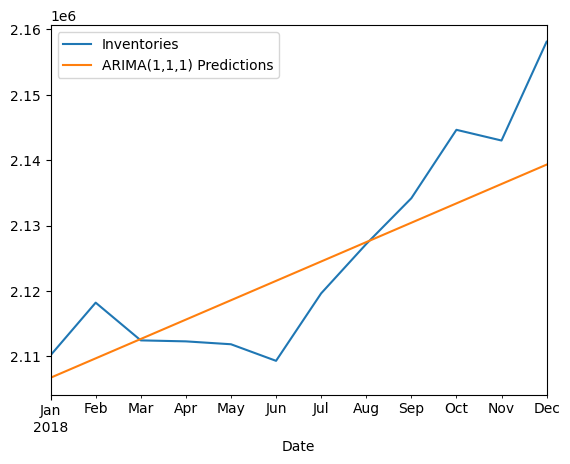

In [77]:
test['Inventories'].plot(legend = True)
predictions.plot(legend = True)

In [68]:
test['Inventories'].mean()

2125075.6666666665

In [71]:
predictions.mean()

2103795.248481907

In [78]:
# Compare predictions to expected values
for i in range(len(predictions)):
    print(f"predicted={predictions[i]:<11.10}, expected={test['Inventories'][i]}")

predicted=2106714.583, expected=2110158
predicted=2109678.139, expected=2118199
predicted=2112641.668, expected=2112427
predicted=2115605.171, expected=2112276
predicted=2118568.647, expected=2111835
predicted=2121532.097, expected=2109298
predicted=2124495.52 , expected=2119618
predicted=2127458.916, expected=2127170
predicted=2130422.285, expected=2134172
predicted=2133385.628, expected=2144639
predicted=2136348.944, expected=2143001
predicted=2139312.234, expected=2158115


NameError: name 'formatter' is not defined

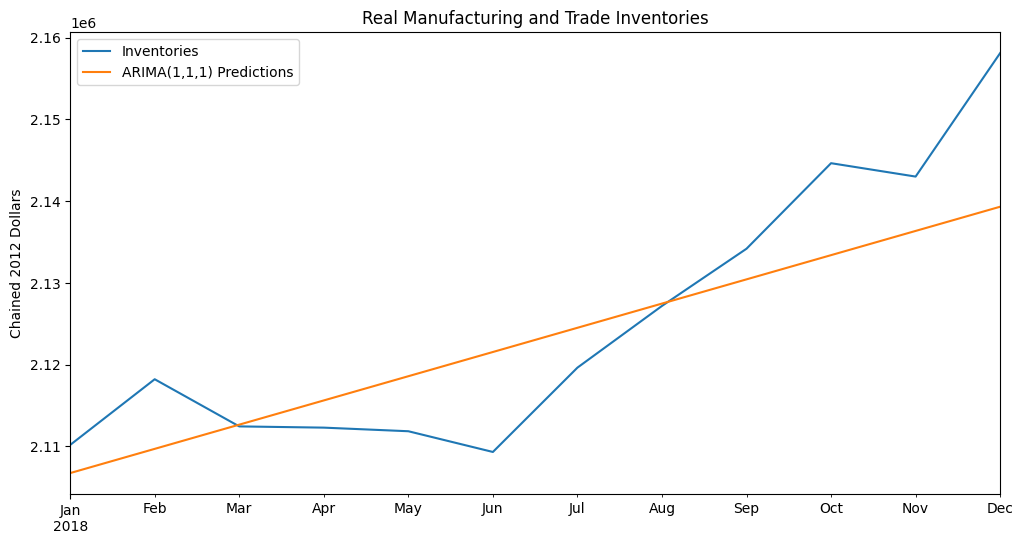

In [79]:
# Plot predictions against known values
title = 'Real Manufacturing and Trade Inventories'
ylabel='Chained 2012 Dollars'
xlabel='' # we don't really need a label here

ax = test['Inventories'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

In [83]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test['Inventories'], predictions)
print(f'ARIMA(1,1,1) MSE Error: {error:11.10}')

ARIMA(1,1,1) MSE Error: 71081088.48


In [84]:
from statsmodels.tools.eval_measures import rmse
error = rmse(test['Inventories'], predictions)
print(f'ARIMA(1,1,1) RMSE Error: {error:11.10}')

ARIMA(1,1,1) RMSE Error: 8430.960116


In [85]:
model = ARIMA(trade_data['Inventories'], order=(1,1,1))
results = model.fit()
fcast = results.predict(len(trade_data),len(trade_data)+11, typ = 'levels').rename('ARIMA(1,1,1) Forecast')

[Text(0.5, 0, ''), Text(0, 0.5, 'Chained 2012 Dollars')]

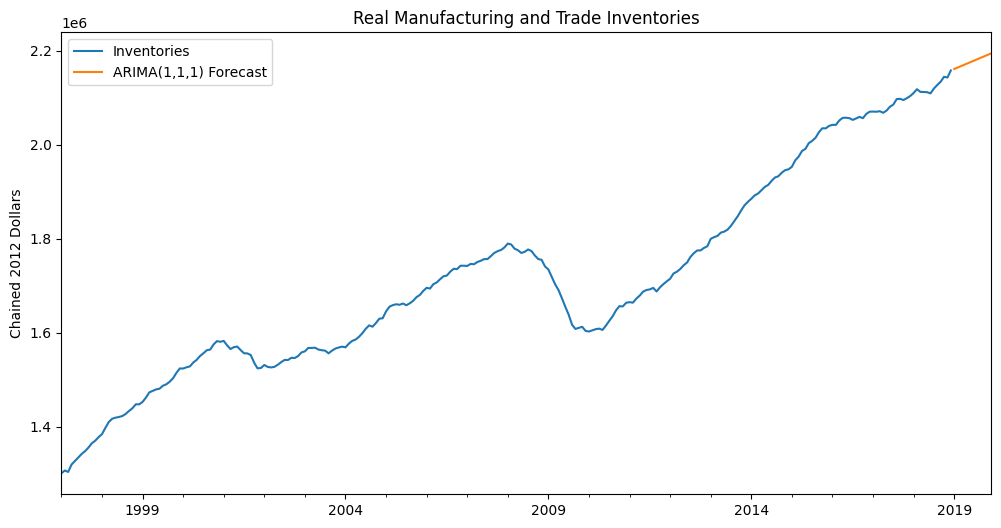

In [87]:
# Plot predictions against known values
title = 'Real Manufacturing and Trade Inventories'
ylabel='Chained 2012 Dollars'
xlabel='' # we don't really need a label here

ax = trade_data['Inventories'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)